In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
test = pd.read_csv('../output/test.csv', sep=',', header=None)

In [5]:
test.sort_values(by=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
52,1,Female,35-39,White,Married-civ-spouse,Secondary education,North America,Private,Other-service,<=50K,69520,70-80k,1520606062349,1520606063655
429,2,Female,30-34,White,Married-civ-spouse,Higher education,North America,Private,Other-service,<=50K,71767,20-30k,1520606062510,1520606067192
10,3,Male,30-34,White,Married-civ-spouse,Secondary education,North America,Private,Exec-managerial,>50K,20692,10-20k,1520606062516,1520606063042
11681,4,Male,25-29,Black,Divorced,Secondary education,North America,Private,Other-service,>50K,66690,90-100k,1520606062519,1520606076613
711,5,Female,20-24,White,Never-married,Higher education,North America,Private,Handlers-cleaners,<=50K,20256,50-60k,1520606062521,1520606067248
1997,6,Male,35-39,Black,Married-civ-spouse,Higher education,North America,Self-emp-not-inc,Craft-repair,<=50K,90301,40-50k,1520606062525,1520606068425
10072,7,Male,30-34,White,Separated,Secondary education,North America,Private,Protective-serv,>50K,32681,30-40k,1520606062527,1520606075175
712,8,Female,20-24,White,Never-married,Higher education,North America,State-gov,Adm-clerical,<=50K,15167,20-30k,1520606062530,1520606067249
383,9,Male,15-19,White,Never-married,Secondary education,North America,Private,Craft-repair,<=50K,28222,80-90k,1520606062534,1520606067187
676,11,Female,55-59,White,Married-civ-spouse,Higher education,North America,Private,Adm-clerical,<=50K,5360,70-80k,1520606062539,1520606067279


### Output Filenames
Output filenames are named: 

    "output-n_" + streamLength + "k_" + k + "l_" + l + "p_" + parallelism;




In [77]:
## READ FILE ACCORDING TO PARAMETERS ##
def ReadFile(k, l, p, n, folder = ""):
    filename = "/{}/output-n_{}k_{}l_{}p_{}.csv".format(folder,n,k,l,p)
    names = ["id","sex","age","race","marst","educ","country","workclass","occ","salary","sensitive","sensitive_class","ingTimestamp","procTimestamp","latency"]
    data = pd.read_csv('../output/' + filename, sep=',', header=None, names = names)
    return data

k, l, p = 50, 10, 10
n = 100000
data = ReadFile(k, l, p, n)

In [7]:
## TOTAL RUNNING TIME
def TotalRunningTime(data): 
    return data.max(axis = 0)["procTimestamp"] - data.min(axis = 0)["ingTimestamp"]
    
print("Total Running Time: {} ms.".format(TotalRunningTime(data)))

Total Running Time: 73918 ms.


Average latency: 2130.57 ms


2130.5737309644669

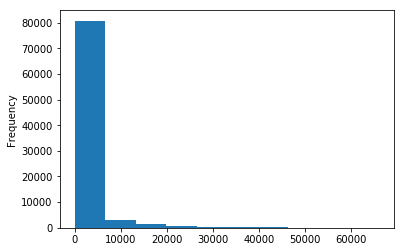

In [10]:
## LATENCY DISTRIBUTION
def AverageLatency(data):    
    return data["latency"].sum()/data["latency"].count()

def PlotLatencyDistribution(data):
    data["latency"].plot.hist(bins = 10)
    print("Average latency: {} ms".format(round(average,2)))
    return average

PlotLatencyDistribution(data)


In [74]:
def AddOrderDelay(data): 
    data = data.assign(OrderDelay = (data["id"]-data.index[0]))
    return data

newData = AddOrderDelay(data)
newData.sample()

,id,sex,age,race,marst,educ,country,workclass,occ,salary,sensitive,sensitive_class,ingTimestamp,procTimestamp,latency,OrderDelay
2367,4134,Male,30-39,White,spouse not present,Higher education,United-States,Private,Prof-specialty,<=50K,36243,30-40k,1520692016284,1520692016802,518,4134


In [ ]:
## K-evaluation
kvals = [20, 30, 40, 50]
lvals = [6, 9, 12, 15]

p = 10
n = 100000
delays = []

for i, k in enumerate(kvals):
    l = lvals[i]
    data = ReadFile(k, l, p, n)
    delays.append(AverageLatency(data))
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(kvals, delays, linewidth=3)
ax.scatter(kvals, delays, marker = "o")
ax.set(title='Tuple delay depending on k. l = 30% of k.',
        xlabel = "Datastream Length",
        ylabel="Stuck Tuples")
plt.show()
    
    

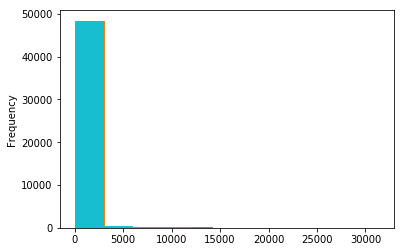

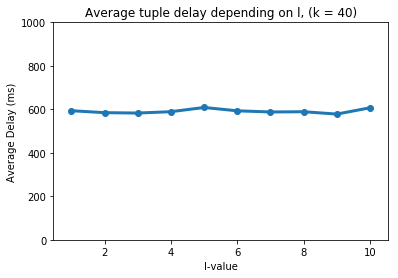

In [80]:
## L-evaluation
lvals = np.arange(11)[1:11]
p = 10
n = 50000
k = 40
delays = []

for i, l in enumerate(lvals):
    l = lvals[i]
    data = ReadFile(k, l, p, n)
    delays.append(AverageLatency(data))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lvals, delays, linewidth=3)
ax.scatter(lvals, delays, marker = "o")
ax.set(title='Average tuple delay depending on l, (k = 40)',
        xlabel = "l-value",
        ylabel="Average Delay (ms)",
          ylim = (0, 1000))
plt.show()
    
    

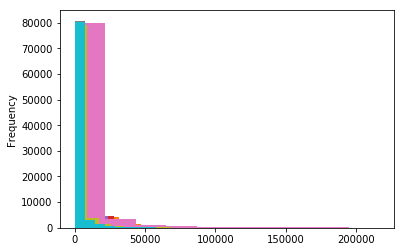

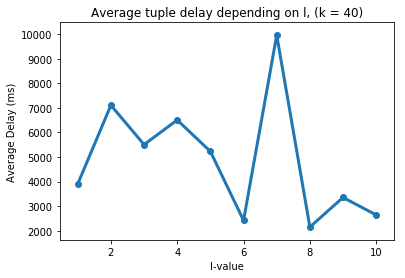

In [78]:
## L-evaluation
lvals = np.arange(11)[1:11]
p = 10
n = 100000
k = 40
delays = []

for i, l in enumerate(lvals):
    l = lvals[i]
    data = ReadFile(k, l, p, n, folder = "l")
    delays.append(AverageLatency(data))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lvals, delays, linewidth=3)
ax.scatter(lvals, delays, marker = "o")
ax.set(title='Average tuple delay depending on l, (k = 40)',
        xlabel = "l-value",
        ylabel="Average Delay (ms)")
plt.show()
    
    